<a href="https://colab.research.google.com/github/amargauge26/GenraEq--cja-ssss/blob/main/Copy_of_GENERA121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
!pip install librosa numpy matplotlib scikit-learn tensorflow kagglehub

import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
import kagglehub           # Download the GTZAN dataset

# Download the dataset
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

# Define the path to the dataset
DATA_PATH = path
print("Path to dataset files:", DATA_PATH)

# Check the contents of the dataset directory
print(os.listdir(DATA_PATH))     # This should show 'Data' and possibly other directories/files.

# Check the contents of the Data directory
data_path = os.path.join(DATA_PATH, 'Data')
print(os.listdir(data_path))    # Ensure this shows 'genres_original', 'features_30_sec.csv', etc.

# Define the correct path to the audio files
audio_data_path = os.path.join(data_path, 'genres_original')
print(os.listdir(audio_data_path))  # Should list the genres like 'rock', 'jazz', etc.

# Define the feature extraction function
def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, duration=30)  # Load audio file
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)  # Extract MFCC features
        mfccs = np.mean(mfccs.T, axis=0)  # Average across time
        return mfccs
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Prepare lists to hold features and labels
features = []
labels = []

# Get the list of genres from the genres_original directory
genres = os.listdir(audio_data_path)

# Loop through each genre and extract features
for genre in genres:
    genre_dir = os.path.join(audio_data_path, genre)
    for file in os.listdir(genre_dir):
        if file.endswith(".wav"):  # Process only .wav files
            file_path = os.path.join(genre_dir, file)
            mfccs = extract_features(file_path)
            if mfccs is not None:  # Only append if feature extraction was successful
                features.append(mfccs)
                labels.append(genre)

print("Features and labels extracted successfully!")

# Convert features and labels to NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Check if features and labels have been populated correctly
if features.size == 0 or labels.size == 0:
    print("Warning: No features or labels extracted. Check the audio files.")
else:
    # Encode the labels into integers
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

    print("Data prepared for training!")
    print("Training data shape:", X_train.shape)
    print("Testing data shape:", X_test.shape)


Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1
['Data']
['genres_original', 'features_30_sec.csv', 'images_original', 'features_3_sec.csv']
['pop', 'rock', 'reggae', 'jazz', 'classical', 'country', 'hiphop', 'blues', 'disco', 'metal']


<ipython-input-15-e0a50fdca0d1>:34: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, duration=30)  # Load audio file
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/jazz/jazz.00054.wav: 
Features and labels extracted successfully!
Data prepared for training!
Training data shape: (799, 13)
Testing data shape: (200, 13)


In [ ]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer for the number of genres

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Model built successfully!")


Model built successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

print("Model trained successfully!")


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1323 - loss: 18.6536 - val_accuracy: 0.2050 - val_loss: 3.9453
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1846 - loss: 6.7334 - val_accuracy: 0.2300 - val_loss: 2.2657
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2208 - loss: 3.2284 - val_accuracy: 0.1750 - val_loss: 2.1638
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2404 - loss: 2.4079 - val_accuracy: 0.2150 - val_loss: 2.1604
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2378 - loss: 2.1989 - val_accuracy: 0.2150 - val_loss: 2.1342
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2526 - loss: 2.1778 - val_accuracy: 0.2000 - val_loss: 2.0990
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3124 - loss: 1.9831 - val_accuracy: 0.2000 - val_loss: 2.0848
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2831 - loss: 1.9976 - val_accuracy: 0.3300 - val_los

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.2f}")


7/7 - 0s - 5ms/step - accuracy: 0.5750 - loss: 1.5230
Test accuracy: 0.57


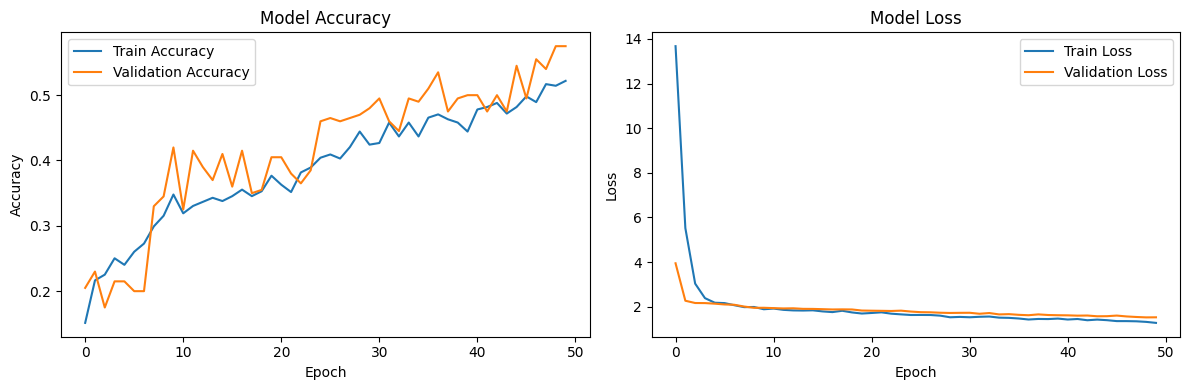

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


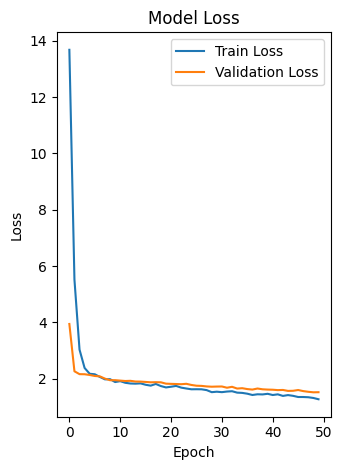

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow import keras

# Save your model using the Keras format
model.save('my_music_genre_model.keras')


In [ ]:
import joblib

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
from tensorflow import keras
import joblib

# Load your model
model = keras.models.load_model('my_music_genre_model.keras')

# Load the label encoder
label_encoder = joblib.load('label_encoder.pkl')


In [ ]:
import librosa
import numpy as np

def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, duration=30)  # Load audio file
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)  # Extract MFCC features
        mfccs = np.mean(mfccs.T, axis=0)  # Average across time
        return mfccs
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [ ]:
sample_file_path = '/content/Pop1.wav'  # Your audio sample path

# Extract features from the audio sample
sample_features = extract_features(sample_file_path)

if sample_features is not None:
    # Reshape the features to match the input shape of the model
    sample_features = sample_features.reshape(1, -1)

    # Make a prediction
    predicted_label_encoded = model.predict(sample_features)
    predicted_label = np.argmax(predicted_label_encoded, axis=1)

    # Decode the predicted label back to the original genre
    predicted_genre = label_encoder.inverse_transform(predicted_label)

    print(f"The predicted genre for the audio sample is: {predicted_genre[0]}")
else:
    print("Feature extraction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The predicted genre for the audio sample is: jazz
